# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [111]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt # for the datestamp on the output
import json
from pprint import pprint
import seaborn as sb


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [112]:
# List for holding coordinates(lat and longs) and cities
coordinates = []
cities = []
country = []
latitud = []
longitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coordinates = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    #lats,longs= coord
    city = citipy.nearest_city(coord[0], coord[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.city_name)
        country.append(city.country_code)
        latitud.append(coord[0])
        longitude.append(coord[1])

# Print the city count to confirm sufficient count
print("Cities", len(cities))
print("Country", len(country))
print("Lats", len(latitud))
print("Longs", len(longitude))

Cities 1500
Country 1500
Lats 1500
Longs 1500


In [113]:
# Creting the DataFrame with the nearest cities from the random coordinates 
city_dict={
    "Latitud":latitud,"Longitude":longitude,"City":cities,"Country":country}

cities_df= pd.DataFrame.from_dict(city_dict,orient='index').transpose()
cities_df


,Latitud,Longitude,City,Country
0,13.505554,-85.735583,wiwili,ni
1,-15.9978,-51.773927,aragarcas,br
2,-73.053399,81.741308,busselton,au
3,-0.682267,-104.333361,puerto ayora,ec
4,27.677739,3.935477,adrar,dz
...,...,...,...,...
1495,-46.054803,128.252305,port lincoln,au
1496,78.701364,-16.231966,illoqqortoormiut,gl
1497,-73.826594,133.379666,new norfolk,au
1498,-51.85666,87.311512,busselton,au


In [114]:
cities_clean = cities_df.drop_duplicates("City",keep="first")
cities_clean

,Latitud,Longitude,City,Country
0,13.505554,-85.735583,wiwili,ni
1,-15.9978,-51.773927,aragarcas,br
2,-73.053399,81.741308,busselton,au
3,-0.682267,-104.333361,puerto ayora,ec
4,27.677739,3.935477,adrar,dz
...,...,...,...,...
1481,26.357562,-87.127302,warrington,us
1485,-9.190521,134.540483,maningrida,au
1486,-26.415898,155.70559,kawana waters,au
1489,54.638885,-103.41177,nipawin,ca


In [115]:
# Reindex DataFrame
cities_clean= cities_clean.reset_index(drop=True)
len(cities_clean)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [141]:
#Weather information, saving config information

# New URL "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

url_current = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set lists to replace latitud and longitude for nearest city to actual coordinates of city
actual_lat = []
actual_long = []

# Setting new weather parameters to retrieve

maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
infoDate = []
city_success = []

# Variables used in the for loop for printings
# Printing the number of record 
num_record = 0
# Printing the number of set starting from 1 changing the number of sets
num_set = 1
# Printing the name of the current city
city_curr= []
country_success =[]

# Printing first message of retrieval of data
print('''Beginning Data Retrieval     
-----------------------------''')

# Looping through all the cities for weather information retrieving
for index,row in cities_clean.iterrows():
    curr_city= row["City"]
    curr_country= row["Country"]
      
# Build query URL
    query_url =f"{url_current}q={curr_city},{curr_country}&units={units}&appid={weather_api_key}"
               
                
    response= requests.get(query_url).json()
    #print(response)
# Creating Exceptions to continue runnig the code
    num_record = num_record + 1
    try:
        actual_lat.append(response["coord"]["lat"])
        actual_long.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        infoDate.append(response["dt"])
        city_success.append(curr_city)
        country_success.append(curr_country)
        
        # Integrating the information retrieved
       
        
        print(f"Processing Record {num_record} of Set {num_set}| {curr_city}")
        
    except:
        #actual_lat.append(np.nan)
        #actual_long.append(np.nan)
        #maxTemp.append(np.nan)
        #humidity.append(np.nan)
        #windSpeed.append(np.nan)
        #cloudiness.append(np.nan)
        #infoDate.append(np.nan)
        print(f"City not found. Skipping...")
        
        if num_record == 35:
            num_set = num_set+1
            num_record = 0
            # Time between them
            time.sleep(6)
            
    #if index == 5:
     #   break
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| wiwili
Processing Record 2 of Set 1| aragarcas
Processing Record 3 of Set 1| busselton
Processing Record 4 of Set 1| puerto ayora
Processing Record 5 of Set 1| adrar
Processing Record 6 of Set 1| faanui
Processing Record 7 of Set 1| cidreira
Processing Record 8 of Set 1| barrow
Processing Record 9 of Set 1| hermanus
Processing Record 10 of Set 1| harlingen
Processing Record 11 of Set 1| hithadhoo
City not found. Skipping...
Processing Record 13 of Set 1| kloulklubed
City not found. Skipping...
Processing Record 15 of Set 1| oriximina
City not found. Skipping...
Processing Record 17 of Set 1| emerald
Processing Record 18 of Set 1| nikolskoye
Processing Record 19 of Set 1| birao
City not found. Skipping...
Processing Record 21 of Set 1| batavia
Processing Record 22 of Set 1| kigoma
Processing Record 23 of Set 1| kawalu
City not found. Skipping...
Processing Record 25 of Set 1| atuona
Processing Reco

Processing Record 207 of Set 1| sulina
Processing Record 208 of Set 1| kindia
Processing Record 209 of Set 1| aykhal
Processing Record 210 of Set 1| teguldet
Processing Record 211 of Set 1| charlestown
Processing Record 212 of Set 1| neyyattinkara
Processing Record 213 of Set 1| beringovskiy
Processing Record 214 of Set 1| isangel
Processing Record 215 of Set 1| giyani
City not found. Skipping...
Processing Record 217 of Set 1| oussouye
Processing Record 218 of Set 1| amapa
Processing Record 219 of Set 1| vestmannaeyjar
Processing Record 220 of Set 1| yugorsk
Processing Record 221 of Set 1| santarem
Processing Record 222 of Set 1| bud
Processing Record 223 of Set 1| yulara
City not found. Skipping...
Processing Record 225 of Set 1| vila do maio
City not found. Skipping...
Processing Record 227 of Set 1| ochakiv
Processing Record 228 of Set 1| tripoli
Processing Record 229 of Set 1| katsuura
Processing Record 230 of Set 1| broome
Processing Record 231 of Set 1| motala
City not found. Sk

City not found. Skipping...
City not found. Skipping...
Processing Record 416 of Set 1| skibbereen
Processing Record 417 of Set 1| chihuahua
Processing Record 418 of Set 1| leh
Processing Record 419 of Set 1| paamiut
Processing Record 420 of Set 1| kupang
Processing Record 421 of Set 1| chengde
Processing Record 422 of Set 1| mandalgovi
Processing Record 423 of Set 1| belyy yar
Processing Record 424 of Set 1| llanes
Processing Record 425 of Set 1| hammerfest
Processing Record 426 of Set 1| plettenberg bay
Processing Record 427 of Set 1| tabuk
Processing Record 428 of Set 1| ambon
Processing Record 429 of Set 1| vao
Processing Record 430 of Set 1| tura
Processing Record 431 of Set 1| kamaishi
City not found. Skipping...
Processing Record 433 of Set 1| ekhabi
Processing Record 434 of Set 1| okrika
Processing Record 435 of Set 1| nantucket
Processing Record 436 of Set 1| nakusp
Processing Record 437 of Set 1| port hedland
Processing Record 438 of Set 1| lazaro cardenas
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [187]:
# Print the city count to confirm sufficient count
print("City", len(city_success))
print("Lat", len(actual_lat))
print("Lng", len(actual_long))
print("Max Temp", len(maxTemp))
print("Humidity", len(humidity))
print("Cloudiness", len(cloudiness))
print("Wind Speed", len(windSpeed))
print("Country", len(country_success))
print("Date", len(infoDate))


City 541
Lat 541
Lng 541
Max Temp 541
Humidity 541
Cloudiness 541
Wind Speed 541
Country 541
Date 541


In [188]:
# Display the DataFrame
cities_weather_df= pd.DataFrame({"City":city_success,"Lat":actual_lat,"Lng":actual_long,"Max Temp":maxTemp,
                                 "Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,
                                 "Country":country_success,"Date":infoDate})

In [189]:
# Save dataframe in output_data file. Export the city data into a .csv.

cities_weather_df.to_csv("output_data/weather_city_data.csv", index=False, header=True)


In [144]:
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wiwili,13.6268,-85.8254,82.40,42,20,11.50,ni,1619720419
1,aragarcas,-15.8975,-52.2508,91.40,29,0,2.30,br,1619720342
2,busselton,-33.6500,115.3333,50.00,97,86,14.18,au,1619720420
3,puerto ayora,-0.7393,-90.3518,84.20,70,40,20.71,ec,1619720420
4,adrar,25.7500,-1.0000,95.34,12,98,19.24,dz,1619720421
...,...,...,...,...,...,...,...,...,...
536,alexandria,38.8048,-77.0469,84.20,54,75,14.97,us,1619720400
537,warrington,30.3841,-87.2750,84.00,74,75,10.36,us,1619720639
538,maningrida,-12.0667,134.2667,74.37,80,100,7.94,au,1619720639
539,nipawin,53.3668,-104.0009,44.60,33,1,18.41,ca,1619720640


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [145]:
stats = cities_weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,19.359166,14.560166,63.021072,67.878004,55.316081,8.369335,1.619721e+09
std,33.635474,91.117826,20.639376,23.164226,36.208219,5.263144,8.295207e+01
min,-54.800000,-175.200000,-1.710000,5.000000,0.000000,0.270000,1.619720e+09
25%,-8.897800,-65.102300,48.000000,53.000000,20.000000,4.610000,1.619720e+09
50%,21.461200,16.119400,66.200000,73.000000,64.000000,7.110000,1.619721e+09
75%,47.666600,95.322200,80.290000,87.000000,90.000000,11.500000,1.619721e+09
max,78.218600,179.316700,111.200000,100.000000,100.000000,31.290000,1.619721e+09


In [146]:
cities_weather_df.value_counts()

City          Lat       Lng        Max Temp  Humidity  Cloudiness  Wind Speed  Country  Date      
abalak         15.4509   6.2793    95.90     5         2           11.90       ne       1619720462    1
patancheru     17.5314   78.2650   82.40     47        40          3.44        in       1619720224    1
port antonio   18.1800  -76.4612   86.00     62        20          21.85       jm       1619720551    1
port alfred   -33.5906   26.8910   64.71     77        99          15.79       za       1619720432    1
ponta do sol   17.1994  -25.0919   77.00     61        20          25.32       cv       1619720460    1
                                                                                                     ..
hithadhoo     -0.6000    73.0833   83.97     69        45          7.36        mv       1619720423    1
hirara         24.8000   125.2833  69.31     77        100         1.68        jp       1619720611    1
hilo           19.7297  -155.0900  73.40     78        90          11

In [147]:
#  Get the indices of cities that have humidity over 100%.
hum = cities_weather_df.loc[(cities_weather_df["Humidity"] > 100),:]


In [148]:
# No citis with Humidity > 100
print(hum)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [149]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_weather_df.drop_duplicates("City",keep="first")
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wiwili,13.6268,-85.8254,82.40,42,20,11.50,ni,1619720419
1,aragarcas,-15.8975,-52.2508,91.40,29,0,2.30,br,1619720342
2,busselton,-33.6500,115.3333,50.00,97,86,14.18,au,1619720420
3,puerto ayora,-0.7393,-90.3518,84.20,70,40,20.71,ec,1619720420
4,adrar,25.7500,-1.0000,95.34,12,98,19.24,dz,1619720421
...,...,...,...,...,...,...,...,...,...
536,alexandria,38.8048,-77.0469,84.20,54,75,14.97,us,1619720400
537,warrington,30.3841,-87.2750,84.00,74,75,10.36,us,1619720639
538,maningrida,-12.0667,134.2667,74.37,80,100,7.94,au,1619720639
539,nipawin,53.3668,-104.0009,44.60,33,1,18.41,ca,1619720640


In [150]:
clean_city_data.reset_index()


,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,wiwili,13.6268,-85.8254,82.40,42,20,11.50,ni,1619720419
1,1,aragarcas,-15.8975,-52.2508,91.40,29,0,2.30,br,1619720342
2,2,busselton,-33.6500,115.3333,50.00,97,86,14.18,au,1619720420
3,3,puerto ayora,-0.7393,-90.3518,84.20,70,40,20.71,ec,1619720420
4,4,adrar,25.7500,-1.0000,95.34,12,98,19.24,dz,1619720421
...,...,...,...,...,...,...,...,...,...,...
536,536,alexandria,38.8048,-77.0469,84.20,54,75,14.97,us,1619720400
537,537,warrington,30.3841,-87.2750,84.00,74,75,10.36,us,1619720639
538,538,maningrida,-12.0667,134.2667,74.37,80,100,7.94,au,1619720639
539,539,nipawin,53.3668,-104.0009,44.60,33,1,18.41,ca,1619720640


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

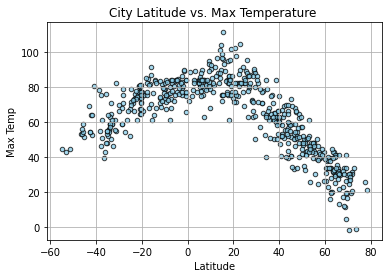

In [151]:
# Create a scatter plot which compares MPG to horsepower
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Max Temperature ")
plt.grid (b=True, which="major",axis="both",linestyle="-") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()


## Latitude vs. Humidity Plot

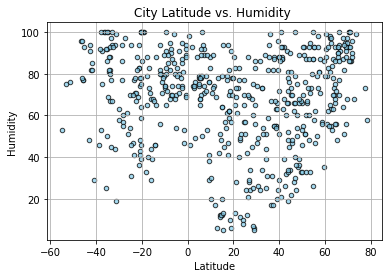

In [152]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Humidity ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

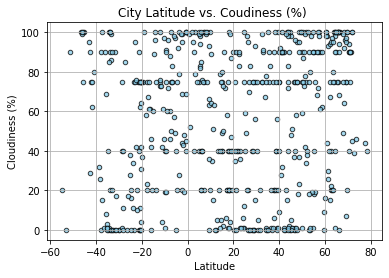

In [153]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Coudiness (%) ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

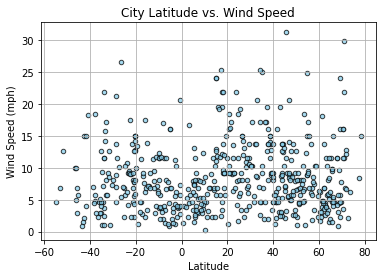

In [154]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Wind Speed ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  

plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which="major",axis="both",linestyle="-") 
#plt.savefig("Figures/fig4_SP_Lat_vs_Wind.png")
plt.show()

## Linear Regression

In [155]:
# Using the fucntion .loc to filter the values < or > than 0. Important, use the original DF, otherwise not possible to do it.

Northern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] > 0]

Southern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] < 0]

In [156]:
Northern_Hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wiwili,13.6268,-85.8254,82.40,42,20,11.50,ni,1619720419
4,adrar,25.7500,-1.0000,95.34,12,98,19.24,dz,1619720421
7,barrow,71.2906,-156.7887,19.40,86,90,6.91,us,1619720244
9,harlingen,53.1748,5.4224,46.40,93,90,10.36,nl,1619720422
11,kloulklubed,7.0419,134.2556,78.80,89,75,6.82,pw,1619720423
...,...,...,...,...,...,...,...,...,...
533,ciechanow,52.8814,20.6200,60.80,48,0,4.61,pl,1619720637
535,coahuayana,18.7333,-103.6833,80.60,57,40,6.91,mx,1619720638
536,alexandria,38.8048,-77.0469,84.20,54,75,14.97,us,1619720400
537,warrington,30.3841,-87.2750,84.00,74,75,10.36,us,1619720639


In [157]:
Southern_Hemisphere 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,aragarcas,-15.8975,-52.2508,91.40,29,0,2.30,br,1619720342
2,busselton,-33.6500,115.3333,50.00,97,86,14.18,au,1619720420
3,puerto ayora,-0.7393,-90.3518,84.20,70,40,20.71,ec,1619720420
5,faanui,-16.4833,-151.7500,81.54,71,61,7.58,pf,1619720421
6,cidreira,-30.1811,-50.2056,69.55,58,0,7.31,br,1619720421
...,...,...,...,...,...,...,...,...,...
524,sola,-13.8833,167.5500,82.40,65,75,6.91,vu,1619720633
526,linares,-35.8500,-71.6000,75.85,25,69,5.06,cl,1619720634
534,lorengau,-2.0226,147.2712,80.31,81,43,4.03,pg,1619720638
538,maningrida,-12.0667,134.2667,74.37,80,100,7.94,au,1619720639


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [160]:
### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8037011695681878


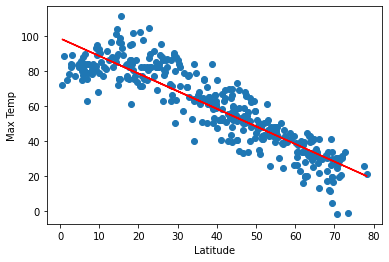

In [167]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [166]:
### Southern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5529189318204659


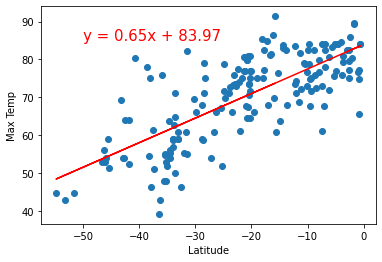

In [165]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06727012483154586


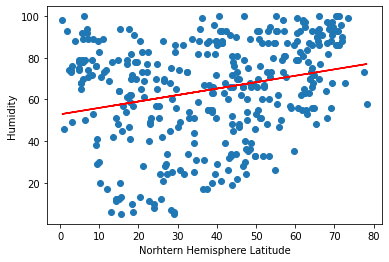

In [170]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 7.148185807899751e-05


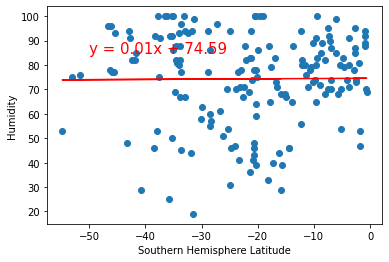

In [172]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.021216330222677555


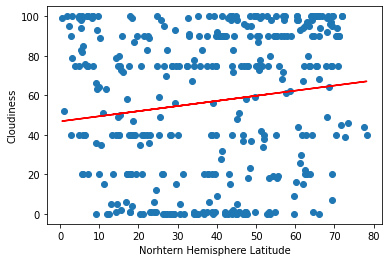

In [173]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02006815730480447


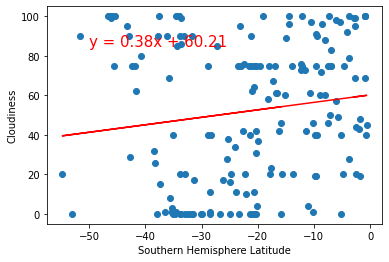

In [174]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000518562268085754


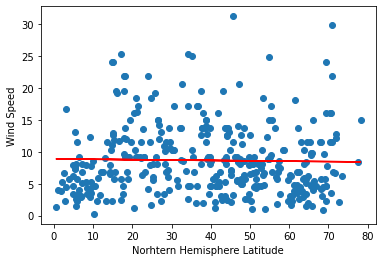

In [177]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007072700923588595


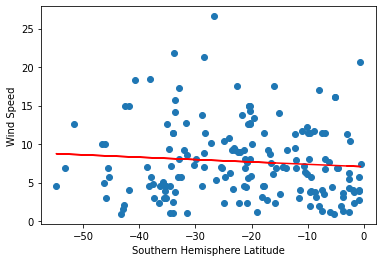

In [178]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Figures/fig5_RP_NHLat_vs_MaxT.png")
plt.show()